## lib load

In [1]:
%matplotlib widget

In [26]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from ACqubit import *
from ACstate import *
from wavefunction1d import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

pi = np.pi

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[1:-1]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Qbit def

In [3]:


J1 = 33
J2 = 1*J1+3

ACQB15 = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]

# Pics

## Ribbon potential

<IPython.core.display.Javascript object>


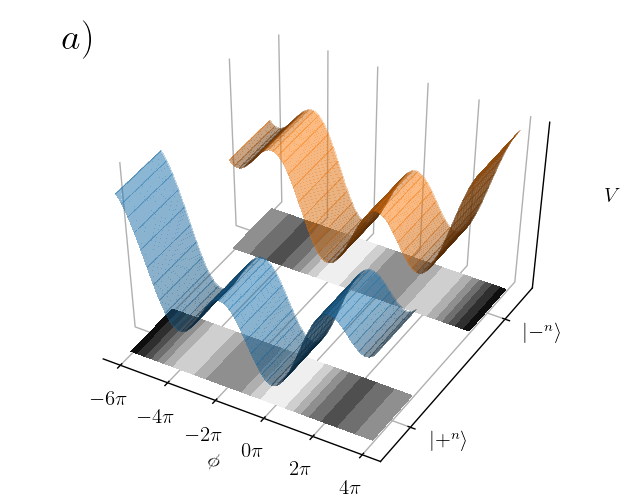

In [174]:
Q = ACQB15
fi_list = np.linspace(-4*pi, 6*pi, 2501)

fi_ext = pi
ng = 0.5
band = 0

st = Q.set_state(ng, fi_ext)

# c = ['xkcd:gray', 'xkcd:green']
c = ['C0', 'C1']


fig = plt.figure( figsize = (5,4))
ax = fig.add_subplot(111, projection='3d')


for i in [1, 0]:
    x = fi_list
    y = abs(i-1) + np.linspace(-.2, .2, 2501)
    X,Y = np.meshgrid(x,y)

    Z = np.zeros( (len(x), len(y)) )

    for j in range(len(y)):
    
    
#     Psi = 100*st.get_Psi(band, i) + 1*st.get_E( band )
        Z[j,:] = 1*Q.V_L(fi_list, fi_ext) +(-1)**i *Q.V_J1e(fi_list)
    

#     ax.plot(x, i*np.ones(101), Z, lw=.5, alpha = 0.9, color = 'xkcd:gray')
    ax.plot_surface(X/2/pi, Y, Z+20, color = c[i],
                   linewidth=0, antialiased=False, alpha = 0.3)
    
    zmin = np.min(Z)
    
    cset = ax.contourf(X/2/pi, Y, Z, zdir='z', offset = zmin, cmap=cm.binary)
#     ax.plot(x, i*np.ones(101), 1*Psi, lw=.5, alpha = 0.9)
    


# ax.set_zlim(0, 5)
# ax.set_xlim(-51, 51)

ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$V$", rotation  = 0)

ax.set_xlabel( r'$\phi$' )
# ax.set_ylabel( r'$| n \rangle $' )

# ax.set_ylabel( r'$|e\rangle = |1^m -^n \rangle $' )

xticks = np.arange(-2,4)
ax.set_xticks(xticks)
ax.set_xticklabels(r'${:1d} \pi$'.format (-2*j) for j in xticks)

ax.set_yticks([0,1])
ax.set_yticklabels([r'$|-^n \rangle $',  r'$|+^n \rangle $'],verticalalignment='baseline',
                   horizontalalignment='left')
ax.set_zticks([])


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.view_init(50,120)



fig.text (0.1, .9, r'$a)$', fontsize = 22)

plt.tight_layout()
ax.xaxis._axinfo['label']['space_factor'] = 0.1
plt.show()
plt.savefig('biflux_potential.pdf', transperent = True)   

## WFs

In [19]:

J1 = 30
J2 = 1*J1+0
Q_ideal = ACQubit (E_CL = 7, 
              E_L = 0.00001, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

<IPython.core.display.Javascript object>


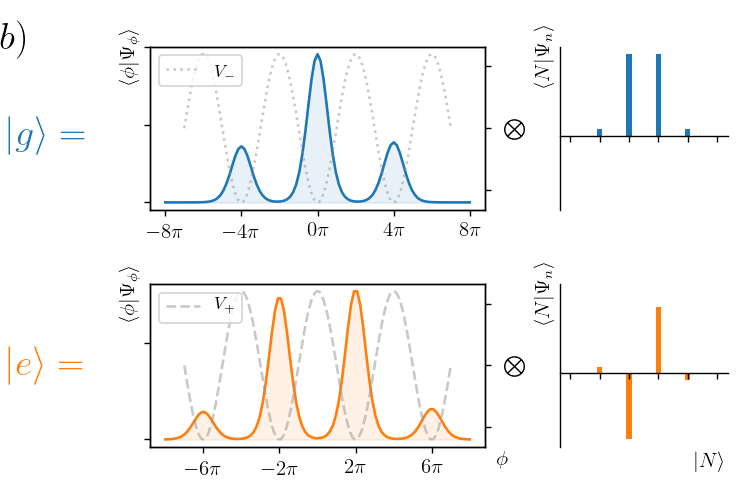

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(-0.0, 0.9, '$b)$')

In [326]:

fig = plt.figure(figsize=(6, 4))
gs = GridSpec(2,2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3], sharey = ax3)



fi = np.linspace(-7*pi, 7*pi, 301)


Q = Q_ideal
# Q = ACQB15

band = 1
qs = [2,3]
axs = [ax1, ax2]

fi_ext = 2*pi*0.05
st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

Vp = 1*Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
Vm = 1*Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

Vs = [Vp, Vm]

q = 2

Psi0 = 150*st.get_Psi(0, 3)
N0 = 150*np.array([ max( st.get_Psi(0, qs), key = abs) for qs in np.arange (st.Q_dim)])

Psi1 = 150*st.get_Psi(1, 3)
N1 = 150*np.array([  max( st.get_Psi(1, qs), key = abs) for qs in np.arange (st.Q_dim)])

Psis = [Psi0, Psi1]

cols = ['C0', 'C1']

labs = ['$V_{-}$', '$V_{+}$']

ticks_ats = [ [-4,-2,0,2,4],
              [-3,-1,1,3]   ]

lss = [':','--']



for j in [0,1]:

    ax = axs[j]
    ax_tw = ax.twinx()
    
    ax_tw.plot(fi /2/pi, Vs[j], 'xkcd:gray', ls = lss[j] , alpha=0.5 , label = labs[j])
    ax_tw.set_ylabel(r'$\bigotimes$')

    ax_tw.legend(loc = 2, prop={'size': 10})

    
    ax.set_ylabel (r'$ \langle \phi |\Psi_{\phi} \rangle $' )
    ax.set_yticklabels([])
    ax_tw.set_yticklabels([])
    
    ticks_at = ticks_ats[j]
    ax.set_xticks(ticks_at)
    ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])

    ax.fill_between(st.fi_list /2/pi, 0, Psis[j], alpha = 0.1, color='C{:1d}'.format(j))
    ax.plot(st.fi_list /2/pi , Psis[j], c='C{:1d}'.format(j), ls = '-' )

    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.yaxis.set_label_coords(-0.025, 0.95)
    
#     ax.text (-10*pi, 0.5, 'bla' )
    
ax2.set_xlabel (' $\\phi$')



# fig, (ax1, ax2)= plt.subplots(2,1, sharey = True)



ax3.bar(st.Q_list, N0, color = 'C0', width = 0.18)
ax4.bar(st.Q_list, N1, color = 'C1', width = 0.18,)

for ax in [ax3,ax4]:
    #        ax.set_ylim((-1.1, 1.1))
#        ax.set_xlim((-1.5, 2.5))

        ax.set_xticks( st.Q_list )
        ax.set_xticklabels( [] )
        ax.set_yticks( [] )
        

        ax.set_ylabel(r'$\langle N |\Psi_{n} \rangle$')
        
        ax.xaxis.set_label_coords(0.9, -0.025)
        ax.yaxis.set_label_coords(-0.025, 0.95)

        
#        ax.set_ylabel(r'$\langle n | \psi \rangle$') 
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_position('zero')

ax.set_xlabel(r'$|N \rangle$')


        
plt.tight_layout()

fig.text(.01, 0.71, r'$ |g \rangle = $', fontsize = 22, color = 'C0')
fig.text(.01, 0.25, r'$ |e \rangle = $', fontsize = 22, color = 'C1')

fig.subplots_adjust(left=0.2)
fig.text (-0.0, .9, r'$b)$', fontsize = 22)

# plt.savefig('biflux_wfs.pdf', transperent = True)   




## Join WFs

<IPython.core.display.Javascript object>


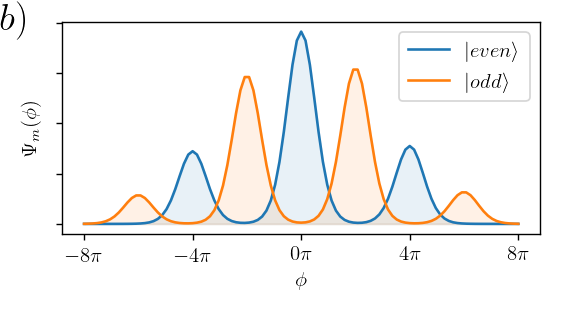

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [327]:
fig, ax = plt.subplots(figsize=(4.5, 2.5))

labs = [r'$|even \rangle$', r'$|odd \rangle$']
for j in [0,1]:
    ax.fill_between(st.fi_list /2/pi, 0, Psis[j], alpha = 0.1, color='C{:1d}'.format(j))
    ax.plot(st.fi_list /2/pi , Psis[j], c='C{:1d}'.format(j), ls = '-', label = labs[j] )
    
ax.legend()

ticks_at =  [-4,-2,0,2,4]    
ax.set_xticks(ticks_at)
ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])    

ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\Psi_m(\phi)$')

ax.set_yticklabels([])


plt.tight_layout()

# fig.subplots_adjust(left=0.2)
fig.text (-0.0, .9, r'$b)$', fontsize = 22)

plt.tight_layout()

plt.savefig('even_odd_wfs.pdf', transperent = True)

## Bands

<IPython.core.display.Javascript object>


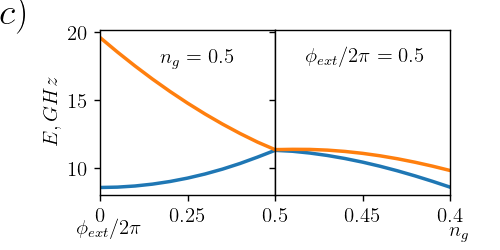

In [169]:



fig, (ax1, ax2)= plt.subplots(1,2, sharey = True, figsize=(4, 2))
Qs = [ ACQB15]

# 

N_ng = 11
N_fi = 11

ng_list = np.linspace(0.5, .4, N_ng)
fi_ext_list = np.linspace(-0*pi, 1*pi, N_fi)

lss = ['-', '-']

axs = [ax1,ax2]

for i in [0]:

    ax_l, ax_r = axs
    
    E_fi = Qs[i].iterate_fi( fi_ext_list, 0.5, 'get_E')  
    E_n = Qs[i].iterate_ng( ng_list, 2*pi*0.5, 'get_E')  


    for b in [0,1]:

        ax_l.plot(fi_ext_list/2/pi,  E_fi[:,b] , c = f'C{b}', ls = lss[i], alpha = 1, lw = 2 )
        ax_r.plot(np.flip(ng_list) , np.flip(E_n[:,b]), c = f'C{b}' , ls= lss[i], lw = 2)

#         ax1.plot(ng_list ,  E_fi[:,1]-E_fi[:,0], c = 'C0' )
#         ax2.plot(fi_ext_list/2/pi , E_n[:,1]-E_n[:,0], c = 'C1' )

    ax_l.set_xlim([-0,.5])
    ax_r.set_xlim([.5,0.4])        
        
plt.subplots_adjust(wspace = 0)


fig.subplots_adjust(left=0.2, bottom = 0.22)
fig.text (-0.0, .9, r'$c)$', fontsize = 22)

ax_l.set_xlabel(r'$\phi_{ext}/2\pi$')
ax_l.xaxis.set_label_coords(0.05, -0.15)
ax_l.text(.17, 17.5, r'$n_g = 0.5$')

x_th = [0,.25]
ax_l.set_xticks(x_th)
ax_l.set_xticklabels(['0','0.25'])


ax_r.set_xlabel(r'$n_{g}$')
ax_r.xaxis.set_label_coords(1.05, -0.18)

x_th = [.5,.45,.4]
ax_r.set_xticks(x_th)
ax_r.set_xticklabels(['0.5','0.45','0.4'])

ax_r.text(.483, 17.6, r'$\phi_{ext}/2\pi = 0.5$')

ax_l.set_ylabel(r'$E, GHz$')

plt.savefig('biflux_bands.pdf', transperent = True)

## Join bands

In [278]:

J1 = 100
J2 = 1*J1+0
Q_ideal2 = ACQubit (E_CL = 7, 
              E_L = 0.0001, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

<IPython.core.display.Javascript object>


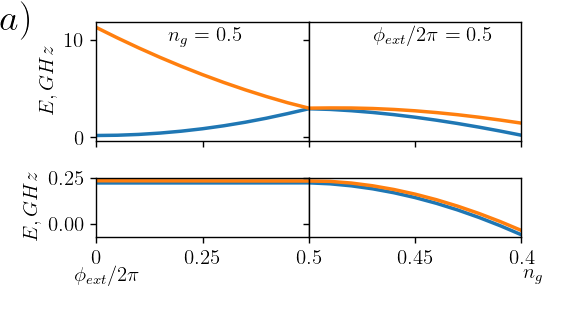

In [329]:



fig = plt.figure(figsize=(4.5, 2.5))
gs = GridSpec(2,2, height_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey = ax1)

ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3], sharey = ax3)



Qs = [ ACQB15, Q_ideal2]

# 

N_ng = 11
N_fi = 11

ng_list = np.linspace(0.5, .4, N_ng)
fi_ext_list = np.linspace(-0*pi, 1*pi, N_fi)

lss = ['-', '-']



axs = [[ax1,ax2],[ax3,ax4]]

off = [8.4, -67.6]

for i in [0,1]:

    ax_l, ax_r = axs[i]
    
    E_fi = Qs[i].iterate_fi( fi_ext_list, 0.5, 'get_E')  
    E_n = Qs[i].iterate_ng( ng_list, 2*pi*0.5, 'get_E')  

    
    E_fi -= off[i]
    E_n -= off[i]

    for b in [0,1]:

        ax_l.plot(fi_ext_list/2/pi,  E_fi[:,b] +0.01*b + 1.3*i, c = f'C{b}', ls = lss[i], alpha = 1, lw = 2 )
        ax_r.plot(np.flip(ng_list) , np.flip(E_n[:,b])+0.01*b + 1.3*i, c = f'C{b}' , ls= lss[i], lw = 2)

#         ax1.plot(ng_list ,  E_fi[:,1]-E_fi[:,0], c = 'C0' )
#         ax2.plot(fi_ext_list/2/pi , E_n[:,1]-E_n[:,0], c = 'C1' )

    
        
    
    ax_l.set_xlim([-0,.5])
    ax_r.set_xlim([.5,0.4])        



#     ax_r.set_yticklabels([])
    
    ax_l.set_ylabel(r'$E, GHz$')
    

        





    x_th = [0,.25]
    ax_l.set_xticks(x_th)

    ax_l.set_xticklabels(['0','0.25'])




    x_th = [.5,.45,.4]
    ax_r.set_xticks(x_th)
    ax_r.set_xticklabels(['0.5','0.45','0.4'])
    plt.setp( ax_r.get_yticklabels(), visible=False) 
    
    if i == 0:
        plt.setp( ax_l.get_xticklabels(), visible=False)  
        plt.setp( ax_r.get_xticklabels(), visible=False)  
        
        ax_l.text(.17, 9.5, r'$n_g = 0.5$')
        ax_r.text(.47, 9.6, r'$\phi_{ext}/2\pi = 0.5$')    
    
    else:
        ax_r.set_xlabel(r'$n_{g}$')
        ax_r.xaxis.set_label_coords(1.05, -0.5)        
        ax_l.set_xlabel(r'$\phi_{ext}/2\pi$')
        ax_l.xaxis.set_label_coords(0.05, -0.5)

fig.subplots_adjust(left=0.2, bottom = 0.22)
fig.text (-0.0, .9, r'$a)$', fontsize = 22)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)

plt.savefig('biflux_dispersion.pdf', transperent = True)

## Parity bands

In [ ]:
Q =  ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = 10, 
              E_C = 35,
              dE_J = 0 )

<IPython.core.display.Javascript object>


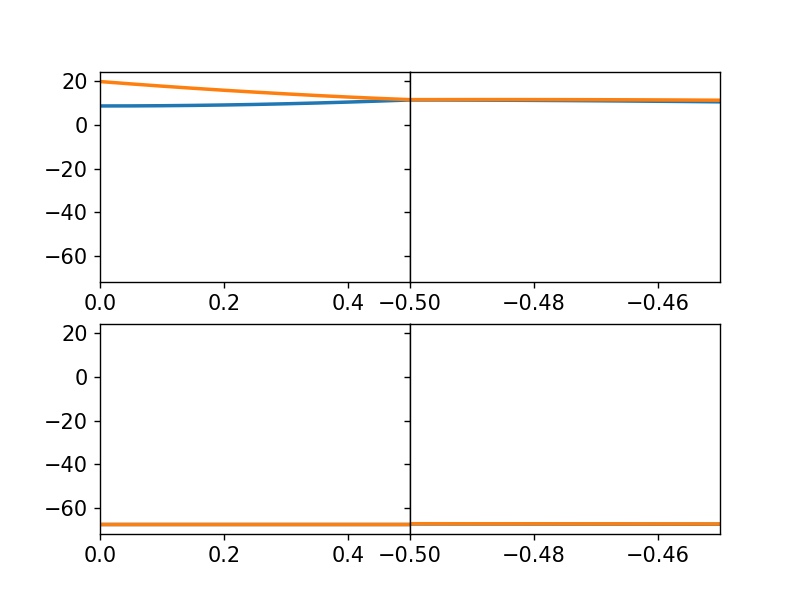

In [43]:
# fig = plt.figure(figsize=(3.5, 3.3))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)


fig, ((ax1, ax2), (ax3,ax4) )= plt.subplots(2,2, sharey = True,  gridspec_kw={'height_ratios': [1, 1]})
Qs = [ ACQB15, Q_ideal]

# 

N_ng = 11
N_fi = 11

ng_list = np.linspace(-0.5, -.45, N_ng)
fi_ext_list = np.linspace(-0*pi, 1*pi, N_fi)

lss = ['-', '-']

axs = [[ax1,ax2],[ax3,ax4]]

for i in [0,1]:

    ax_l, ax_r = axs[i]
    
    E_fi = Qs[i].iterate_fi( fi_ext_list, 0.5, 'get_E')  
    E_n = Qs[i].iterate_ng( ng_list, 2*pi*0.5, 'get_E')  


    for b in [0,1]:

        ax_l.plot(fi_ext_list/2/pi,  E_fi[:,b] +0.1*b + 1.3*i, c = f'C{b}', ls = lss[i], alpha = 1, lw = 2 )
        ax_r.plot(ng_list , E_n[:,b]+0.1*b + 1.3*i, c = f'C{b}' , ls= lss[i], lw = 2)

#         ax1.plot(ng_list ,  E_fi[:,1]-E_fi[:,0], c = 'C0' )
#         ax2.plot(fi_ext_list/2/pi , E_n[:,1]-E_n[:,0], c = 'C1' )

    ax_l.set_xlim([-0,.5])
    ax_r.set_xlim([-.5,-0.45])        
        
plt.subplots_adjust(wspace = 0)



# ax1.set_yscale('log')

# ax1.set_ylim([-1,12])
# ax4.set_ylim([12,15])

# ax2.set_yticks([])

<IPython.core.display.Javascript object>


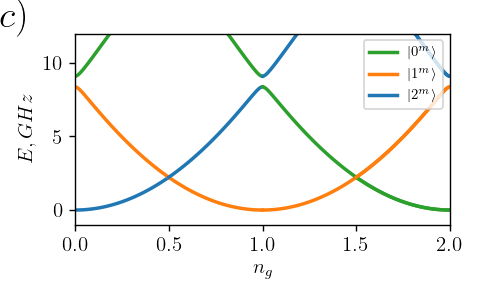

In [251]:
import matplotlib.colors


segs = [0,1,2,3]

fig, ax= plt.subplots( figsize=(4, 2.25))


N_fi = 101

fi_ext_lists = [ np.linspace(i*pi, (i+1)*pi, N_fi) for i in segs ]
    
cs = [['C0', 'C1', 'C2'],
      ['C1', 'C0', 'C2'],
      ['C1', 'C2', 'C0'],
      ['C2', 'C1', 'C0']]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C0","C2"])

Es = []

for s in segs:
    
    c = cs[s]
    fi_ext_list = fi_ext_lists[s]
    
    E_fi = Q.iterate_fi( fi_ext_list, 0.5, 'get_E')  

    offset = min(E_fi[:,0])
    
    E_fi -= offset
       
#     colorline(fi_ext_list/2/pi,  E_fi[:,0], z = fi_ext_list/10, cmap = cmap)
#     colorline(fi_ext_list/2/pi,  E_fi[:,1], z = fi_ext_list, cmap = cmap)
#     colorline(fi_ext_list/2/pi,  E_fi[:,2], cmap = cmap)

    ax.plot(fi_ext_list/2/pi,  E_fi[:,0] , c = c[0],  alpha = 1, lw = 2 )
    ax.plot(fi_ext_list/2/pi , E_fi[:,1], c = c[1] ,  lw = 2)
    ax.plot(fi_ext_list/2/pi , E_fi[:,2], c = c[2] ,  lw = 2)

ax.plot(fi_ext_list/2/pi,  E_fi[:,0] , c = c[0], lw = 2 , label = r'$|0^m \rangle$')
ax.plot(fi_ext_list/2/pi , E_fi[:,1], c = c[1] ,  lw = 2, label = r'$|1^m \rangle$')
ax.plot(fi_ext_list/2/pi , E_fi[:,2], c = c[2] ,  lw = 2, label = r'$|2^m \rangle$')

ax.legend(loc = 1,prop={'size': 8})

ax.set_xlabel(r'$n_g$')
ax.set_ylabel(r'$E, GHz$')

ax.set_xlim([0, 2])
ax.set_ylim([-1, 12])

fig.subplots_adjust(left=0.15, bottom = 0.2)
fig.text (0.0, .9, r'$c)$', fontsize = 22)



plt.savefig('biflux_bands.pdf', transperent = True)

In [218]:
a = np.array([1,2])
b = np.array([3,4])

np.concatenate([a,b])

array([1, 2, 3, 4])

## Matrix element

In [ ]:


ACQB15_symm = ACQubit (E_CL = 15, 
              E_L = 0.7, 
              E_J = 33, #33
              E_C = 8,
              dE_J = 0 )  #6.5 

<IPython.core.display.Javascript object>


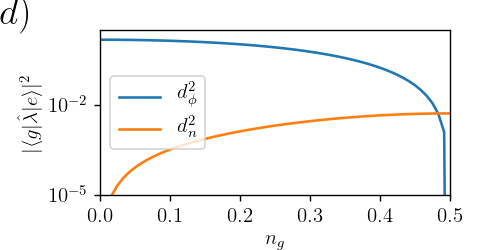

In [170]:


fig, ax = plt.subplots(figsize=(4,2))
Qs = [ ACQB15_symm]


N_ng = 61
N_fi = 21

ng_list = np.linspace(0, .5, N_ng)
fi_ext_list = np.linspace(0*pi, 1*pi, N_fi)

for Q in Qs:

    melf = Q.iterate_ng( ng_list, 0.25*2*pi, 'get_fi_ij', 0, 1)  
    meln = Q.iterate_ng( ng_list, 0.25*2*pi, 'get_n_ij', 0, 1)  




#     ax.plot(ng_list , melf**2, c = 'C0' ,label = r'$|\langle g | \hat{\phi} | e \rangle|^2$' )
#     ax.plot(ng_list,  meln**2, c = 'C1',label = r'$|\langle g | \hat{n} | e \rangle|^2$' )

    ax.plot(ng_list , melf**2, c = 'C0' ,label = r'$d_{\phi}^2$' )
    ax.plot(ng_list,  meln**2, c = 'C1',label = r'$d_{n}^2$' )



ax.legend(loc = 6)


ax.set_ylabel(r'$ |\langle g | \hat{\lambda} | e \rangle|^2 $')
ax.set_xlabel(r'$n_g $')
        
        

ax.set_yscale('log')
ax.set_ylim([1e-5,3])
ax.set_xlim([0,0.5])

fig.subplots_adjust(left=0.2, bottom = 0.22)


fig.text (0., .9, r'$d)$', fontsize = 22)

plt.savefig('biflux_matel.pdf', transperent = True)

# 3d bands

In [94]:
bands = [0,1]
# Q = ACQB15

Q = ACQubit (E_CL = 7, 
              E_L = 0.006, 
              E_J = 70, 
              E_C = 35,
              dE_J = 0 )

N_ng = 21
N_fi = 21

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)



In [95]:
sts = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [6]:
bands = [0,1]
Q3d = ACQB15

N_ng = 11
N_fi = 11

ng_list = np.linspace(0, 0.5, N_ng)
fi_ext_list = np.linspace(0, 1*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)



In [ ]:
sts2 = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [97]:
fig = plt.figure()
ax = fig.gca(projection='3d')


c = ['b','r']

for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = c[b],
                   linewidth=0, antialiased=False, alpha = 0.1)

#     ax.contour3D(ng_grd, fi_ext_grd, E3d, zdir = 'y')
    ax.plot(ng_list, 0.5*np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(0.5*np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, 0*np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

ax.view_init(azim=-115, elev=15)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g, 2e$')
ax.set_xlabel(r'$\phi_{ext}, \Phi_0$')
ax.set_zlabel('Energy')



ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0,  0.5 , 1])
# ax.set_zticklabels([])

plt.tight_layout()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


FigureCanvasNbAgg()

<IPython.core.display.Javascript object>


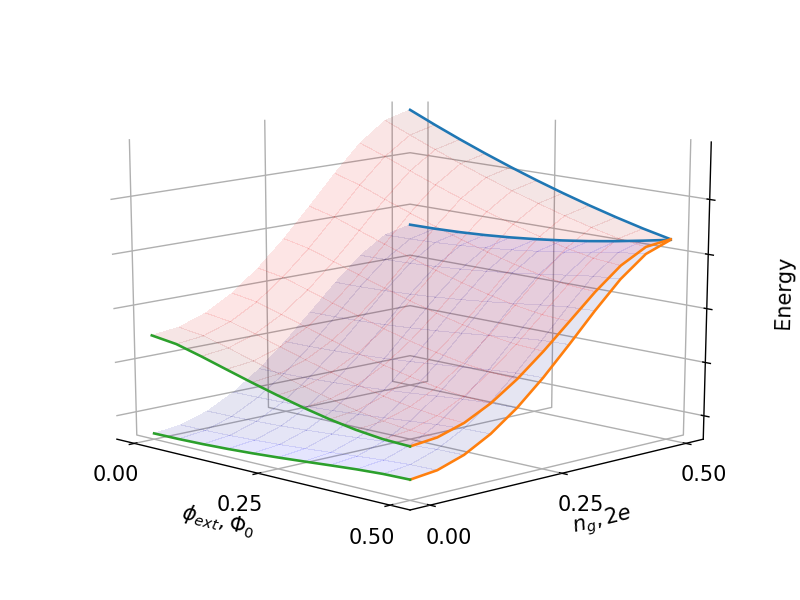

In [181]:
fig = plt.figure()
ax = fig.gca(projection='3d')


c = ['b','r']

for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts2] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = c[b],
                   linewidth=0, antialiased=False, alpha = 0.1)

#     ax.contour3D(ng_grd, fi_ext_grd, E3d, zdir = 'y')
    ax.plot(ng_list, 0.5*np.ones(N_fi), E3d[-1], c = 'C0' )
    ax.plot(0.5*np.ones(N_ng),fi_ext_list/2/pi , E3d[:, -1], c = 'C1' )
    ax.plot(ng_list, 0.0*np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

ax.view_init(azim=-45, elev=15)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g, 2e$')
ax.set_xlabel(r'$\phi_{ext}, \Phi_0$')
ax.set_zlabel('Energy')

ax.set_xticks([0, 0.25, 0.5])
ax.set_yticks([0, 0.25, 0.5])
ax.set_zticklabels([])

plt.tight_layout()

In [26]:
a = np.array([-10,1])

max(a, key = abs)


-10

# Old version

In [57]:
np.shape(E_n[:,0])

(11,)

## Bars 


<IPython.core.display.Javascript object>


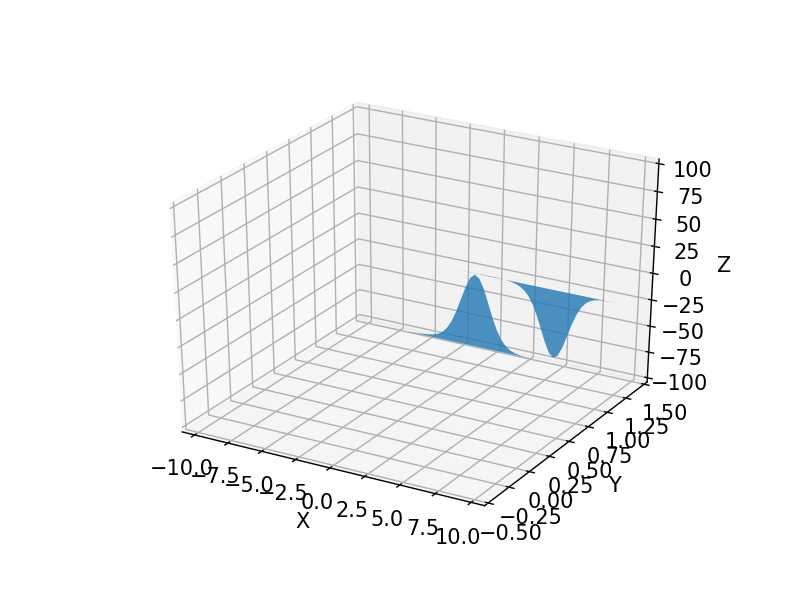

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [6]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib.collections import PolyCollection

from matplotlib import colors as mcolors


# Fixing random state for reproducibility
np.random.seed(19680801)


def cc(arg):
    '''
    Shorthand to convert 'named' colors to rgba format at 60% opacity.
    '''
    return mcolors.to_rgba(arg, alpha=0.6)


def polygon_under_graph(xlist, ylist):
    '''
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    '''
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make verts a list, verts[i] will be a list of (x,y) pairs defining polygon i
verts = []


for i in range(len(y))[2:4]:
    
    
    Psi = 300*st.get_Psi(band, i) + 0*st.get_E( band )
    Z = Q.V_L(fi_list, fi_ext) - Q.V_J1e(fi_list)
    verts.append(polygon_under_graph(x, Psi))
    


poly = PolyCollection(verts,  alpha=0.8)#, facecolors=[cc('r'), cc('g'), cc('b'), cc('y')])
ax.add_collection3d(poly, zs=y[2:4], zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10.5,10.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(-100, 100)

plt.show()

<IPython.core.display.Javascript object>


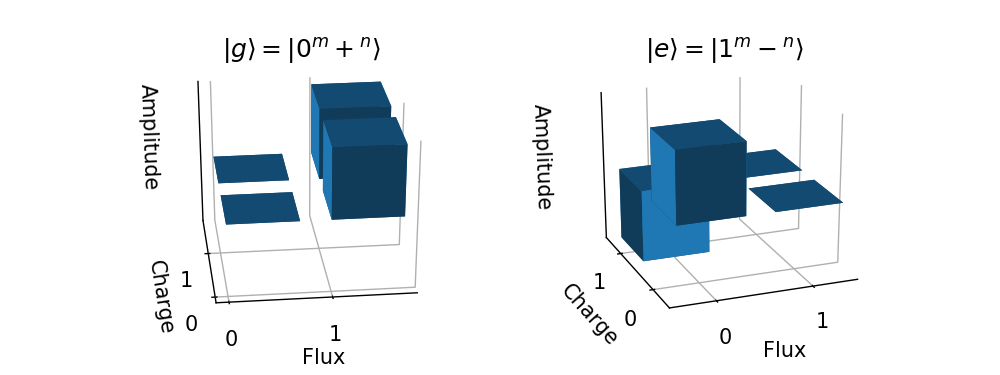

In [157]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(2)
_y = np.arange(2)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

n_p = np.array([1,1])
n_m = np.array([1,-1])

m_0 = np.array([0,1])
m_1 = np.array([1,0])


top = np.kron( n_p, m_0  )
bottom = np.zeros_like(top)
width = depth = 0.7

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, alpha = 0.5)
ax1.set_title(r'$|g\rangle = |0^m +^n \rangle $')

top = np.kron( n_m, m_1  )
bottom = np.zeros_like(top)
width = depth = 0.7

ax2.bar3d(x- width/2, y-depth/2, bottom, width, depth, top, shade=True)
# ax2.bar3d(x- width/2, y-depth/2, top, width, depth, bottom, shade=True)

ax2.set_title(r'$|e\rangle = |1^m -^n \rangle $')


for ax in [ax1, ax2]:
    ax.set_ylabel('Charge')
    ax.set_xlabel('Flux')
    ax.set_zlabel('Amplitude')
    
    # ax.set_xlim(-10.5,10.5)
    # ax.set_ylim(-0.5, 1.5)
    ax.set_zlim(-1, 1)
    
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
#     ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.set_xticklabels([0,1])
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])

    ax.set_zticks([])
#     ax.set_ztickslabels([0,1])


plt.show()

<IPython.core.display.Javascript object>


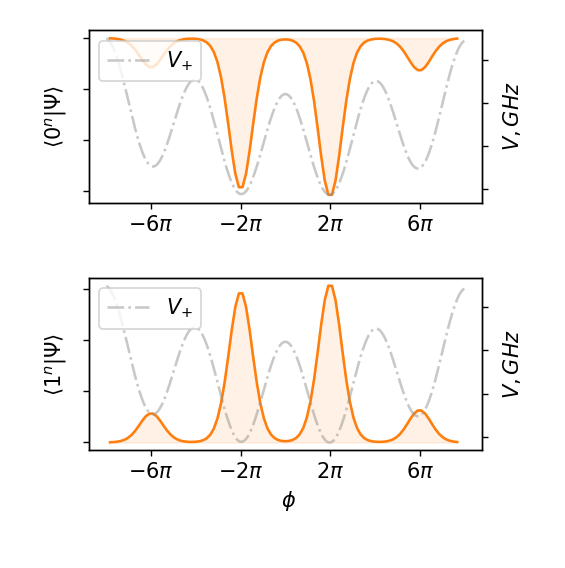

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [37]:
fig = plt.figure(figsize=(3.5, 3.3))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fi = np.linspace(-8*pi, 8*pi, 301)
fi_ext = 2*pi*0.05

band = 1
qs = [2,3]
axs = [ax1, ax2]

st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

# for band in [0,1]:

for q, ax in zip(qs, axs):

    
    ax_tw = ax.twinx()
    
    Vp = 1e4*Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
    Vm = 1e4*Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

    if band %2 == 0 :
        ax_tw.plot(fi /2/pi, Vp, 'xkcd:gray', ls = ':' , alpha=0.5 , label = '$V_{-}$')
        sl = slice(40,62)
    else:
        ax_tw.plot(fi /2/pi, Vm, 'xkcd:gray', ls = '-.',  alpha=0.5 , label = '$V_{+}$')
        sl = slice(50,75)

    sl = slice(1,99)
    Psi = 150*st.get_Psi(band, q) + 0*st.get_E( band )
    ax.fill_between(st.fi_list[sl] /2/pi, 0, Psi[sl], alpha = 0.1, color='C{:1d}'.format(band))
    ax.plot(st.fi_list[sl] /2/pi , Psi[sl], c='C{:1d}'.format(band), ls = '-' )



    ax_tw.set_ylabel('$V, GHz$')



    vmax = np.max([np.max(Vp), np.max(Vm) ] )
    vmin = np.min([np.min(Vp), np.min(Vm) ] )



#     ax.set_ylim(vmin - 0.2*np.abs(vmin),vmax) 
    ax_tw.legend(loc = 2)
    ax.set_ylabel (r'$\langle  {:1d}^n |\Psi \rangle $'.format(j) )
    j +=1


#     lim = ax.get_ylim()
#     ax_tw.set_ylim(lim)
#     ax_tw.set_ylim( (-50, 120) )
#     ax.set_ylim( (-50, 120) )
    
    ax.set_yticklabels([])
    ax_tw.set_yticklabels([])
    
    
    ticks_at = [-3,-1,1,3]
    ax.set_xticks(ticks_at)
    ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])


    
ax2.set_xlabel (' $\\phi$')
plt.tight_layout()


<IPython.core.display.Javascript object>


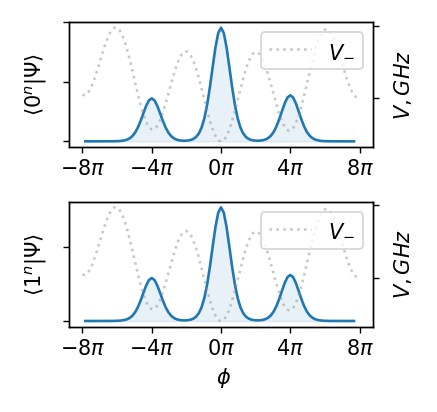

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5277: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5283: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [35]:
fig = plt.figure(figsize=(3.5, 3.3))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fi = np.linspace(-8*pi, 8*pi, 301)
fi_ext = 2*pi*0.05

band = 0
qs = [2,3]
axs = [ax1, ax2]

st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

# for band in [0,1]:

for q, ax in zip(qs, axs):

    
    ax_tw = ax.twinx()
    
    Vp = 10000*Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
    Vm = 10000*Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

    if band %2 == 0 :
        ax_tw.plot(fi /2/pi, Vp, 'xkcd:gray', ls = ':' , alpha=0.5 , label = '$V_{-}$')
        sl = slice(40,62)
    else:
        ax_tw.plot(fi /2/pi, Vm, 'xkcd:gray', ls = '-.',  alpha=0.5 , label = '$V_{+}$')
        sl = slice(50,75)

    sl = slice(1,99)
    Psi = 150*st.get_Psi(band, q) + 0*st.get_E( band )
    ax.fill_between(st.fi_list[sl] /2/pi, 0, Psi[sl], alpha = 0.1, color='C{:1d}'.format(band))
    ax.plot(st.fi_list[sl] /2/pi , Psi[sl], c='C{:1d}'.format(band), ls = '-' )



    ax_tw.set_ylabel('$V, GHz$')



    vmax = np.max([np.max(Vp), np.max(Vm) ] )
    vmin = np.min([np.min(Vp), np.min(Vm) ] )



#     ax.set_ylim(vmin - 0.2*np.abs(vmin),vmax) 
    ax_tw.legend(loc = 1)
    ax.set_ylabel (r'$\langle  {:1d}^n |\Psi \rangle $'.format(j) )
    j +=1


#     lim = ax.get_ylim()
#     ax_tw.set_ylim(lim)
#     ax_tw.set_ylim( (-50, 120) )
#     ax.set_ylim( (-50, 120) )
    
    ax.set_yticklabels([])
    ax_tw.set_yticklabels([])
    
    
    ticks_at = [-4,-2,0,2,4]
    ax.set_xticks(ticks_at)
    ax.set_xticklabels([r'${:1d} \pi$'.format(2*i) for i in ticks_at  ])


    
ax2.set_xlabel (' $\\phi$')
plt.tight_layout()


In [96]:
2%2


0

<IPython.core.display.Javascript object>


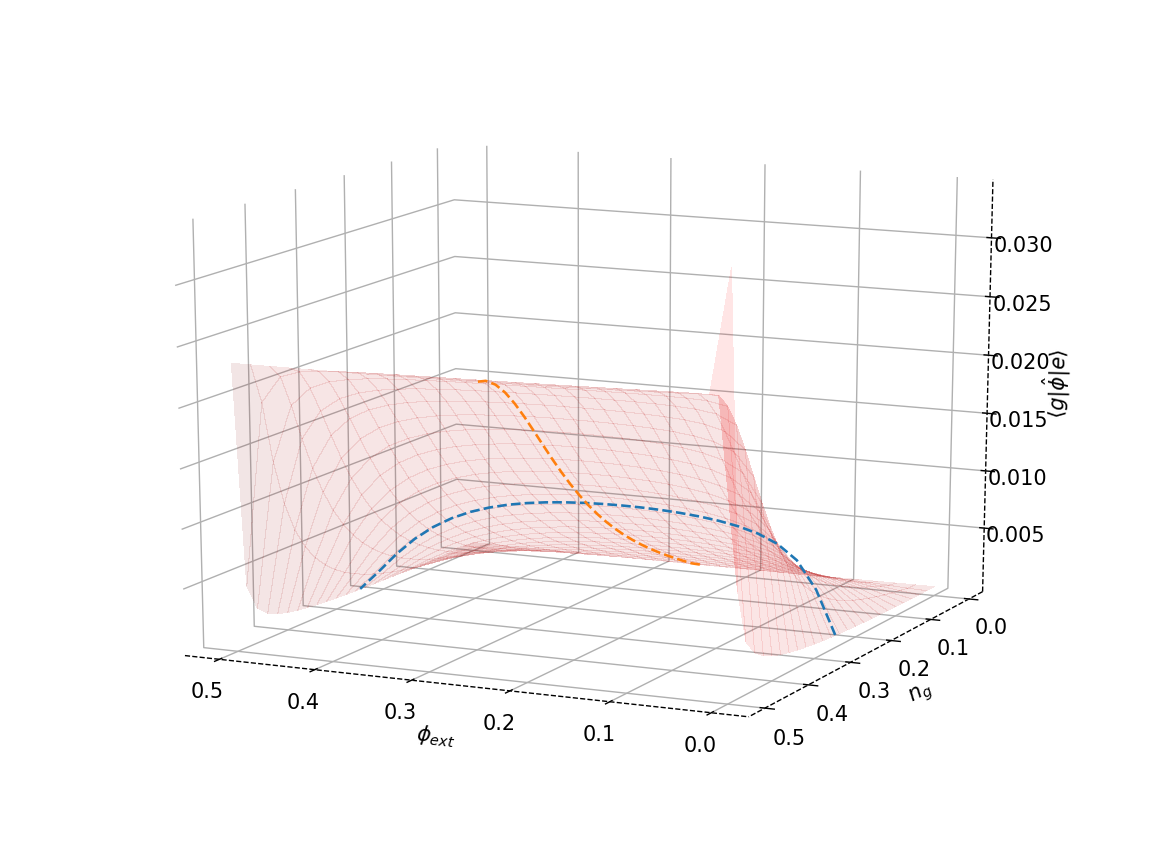

In [102]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# for b in bands:

# fi3d = np.reshape(np.array([st.get_fi_ij(0,1)  for st in sts] )[:], (N_ng,N_fi ))


# surf = ax.plot_surface(ng_grd, fi_ext_grd, fi3d, color = 'b',
#                linewidth=0, antialiased=False, alpha = 0.1)


# ax.plot(ng_list, 0.25*np.ones(N_fi), fi3d[int(N_fi/2)], c = 'C0' )
# ax.plot(0.25*np.ones(N_ng),fi_ext_list/2/pi , fi3d[:, int(N_ng/2)], c = 'C1' )
# ax.plot(ng_list, np.ones(N_fi), fi3d[0], c = 'C2' )


n3d = np.reshape(np.array([st.get_n_ij(0,1)  for st in sts] )[:], (N_ng,N_fi ))


surf = ax.plot_surface(ng_grd, fi_ext_grd, n3d, color = 'r',
               linewidth=0, antialiased=False, alpha = 0.1)


ax.plot(ng_list, 0.25*np.ones(N_fi), n3d[int(N_fi/2)], c = 'C0' )
ax.plot(0.25*np.ones(N_ng),fi_ext_list/2/pi , n3d[:, int(N_ng/2)], c = 'C1' )
# ax.plot(ng_list, np.ones(N_fi), n3d[0], c = 'C2' )


ax.view_init(azim=115, elev=15)


# ax.set_zscale('log')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g$')
ax.set_xlabel(r'$\phi_{ext}$')
ax.set_zlabel(r'$\langle  g|\hat{\phi} |e \rangle $')


plt.tight_layout()

<IPython.core.display.Javascript object>


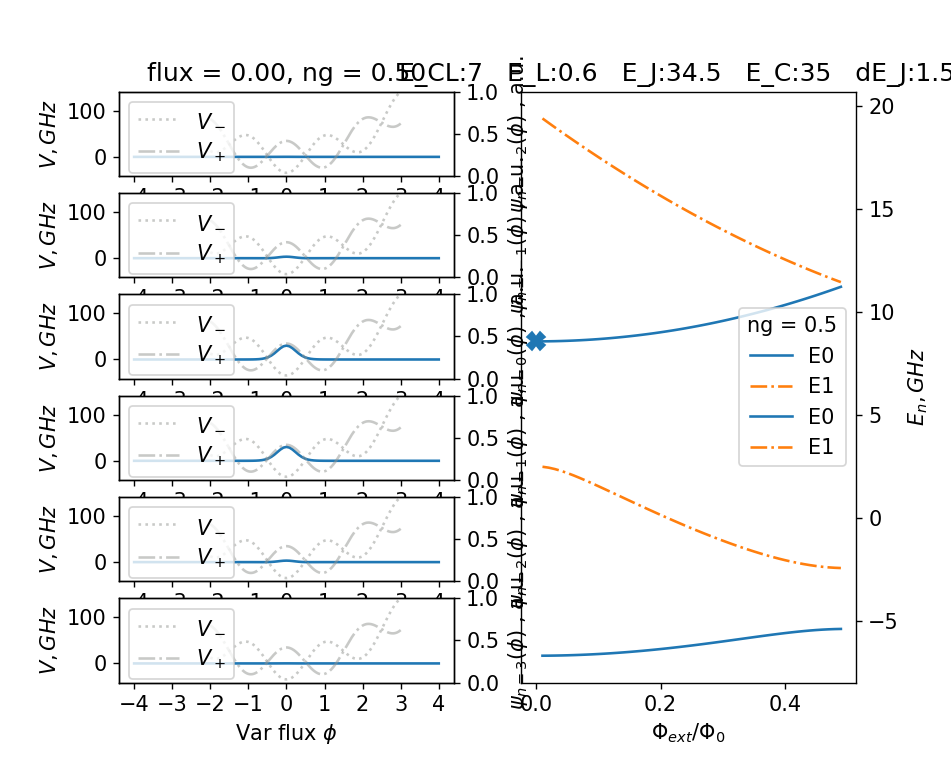

D:\anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(<Figure size 1500x1000 with 13 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x2a2d964deb8>])

In [23]:
ACQB15.plot_bands_Psi(fi_ext_list, [0,.5], [0,1])

In [ ]:


J1 = 33
J2 = 1*J1+0

ACQB15_s = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]

In [ ]:
bands = [0,1]
Q = ACQB15_s

N_ng = 51
N_fi = 51

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)

sts_s = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')


for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts_s] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = 'b',
                   linewidth=0, antialiased=False, alpha = 0.1)


    ax.plot(ng_list, np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

    
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


# qp decay

In [58]:
bands = [0,1]
Q = ACQB15

N_ng = 51
N_fi = 51

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)



<IPython.core.display.Javascript object>


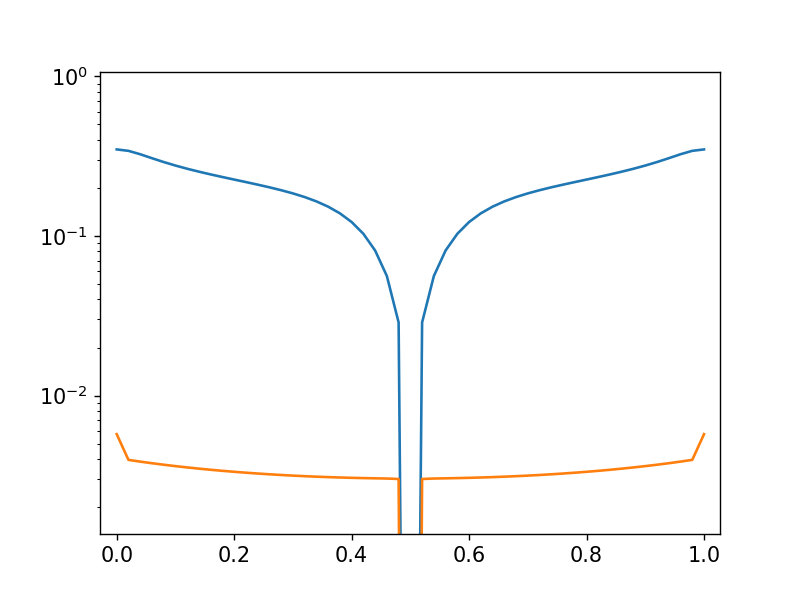

In [62]:
qp_ij = []

qp_ij_0e = Q.iterate_fi( fi_ext_list, 0.0, 'get_qp_ij',0,1 )

qp_ij_1e = Q.iterate_fi( fi_ext_list, 0.5, 'get_qp_ij',0,1 )

fig,ax = plt.subplots()

ax.plot(fi_ext_list/2/pi, qp_ij_0e)
ax.plot(fi_ext_list/2/pi, qp_ij_1e)

ax.set_yscale('log')